In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



data = pd.read_csv("train.csv")
print(data.head())
x_predict =pd.read_csv("test.csv")


   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         

In [3]:
print(data.shape)
labels=data["label"]
all_x=data.iloc[:,1:]
all_x=all_x/255 #try out this normalisation
P=all_x.shape[1] # 
N_obs=all_x.shape[0] #number of observations

K=10
#create one hot encoded y
all_y=np.zeros((N_obs,K))
for i in range(len(labels)):
    idx=labels[i]
    all_y[i,idx]=1
print(all_y[1:10])

n_train=30000
x_train=all_x[0:n_train]
x_test=all_x[n_train:]
y_train=all_y[0:n_train]
y_test=all_y[n_train:]

x_predict=x_predict/255

##





(42000, 785)
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


C:\Users\Rudolfs\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


x_train shape: (30000, 784)
30000 train samples
12000 test samples
Train on 30000 samples, validate on 12000 samples
Epoch 1/12
30000/30000 [==============================] - 6s 196us/step - loss: 0.5004 - acc: 0.8392 - val_loss: 0.3019 - val_acc: 0.9046
Epoch 2/12
30000/30000 [==============================] - 5s 154us/step - loss: 0.1425 - acc: 0.9552 - val_loss: 0.1130 - val_acc: 0.9647
Epoch 3/12
30000/30000 [==============================] - 5s 152us/step - loss: 0.0944 - acc: 0.9708 - val_loss: 0.1008 - val_acc: 0.9683
Epoch 4/12
30000/30000 [==============================] - 4s 149us/step - loss: 0.0622 - acc: 0.9810 - val_loss: 0.1845 - val_acc: 0.9512
Epoch 5/12
30000/30000 [==============================] - 5s 163us/step - loss: 0.0429 - acc: 0.9867 - val_loss: 0.0953 - val_acc: 0.9741
Epoch 6/12
30000/30000 [==============================] - 6s 202us/step - loss: 0.0306 - acc: 0.9909 - val_loss: 0.1262 - val_acc: 0.9667
Epoch 7/12
30000/30000 [==============================]

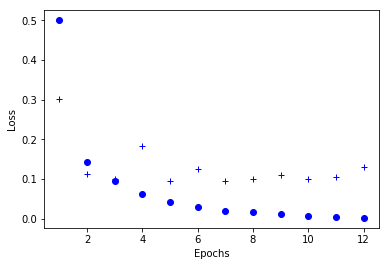

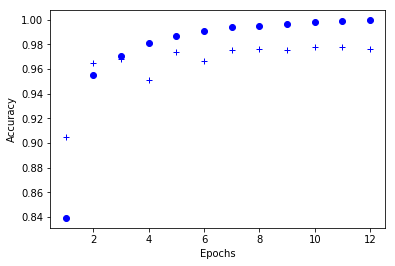

In [4]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras import regularizers

batch_size = 128
num_classes = 10
epochs = 12

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

input_shape=(x_train.shape[1])

model = Sequential()
model.add(Dense(400, activation='relu', input_dim=input_shape))
model.add(Dense(200, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

###
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo')
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

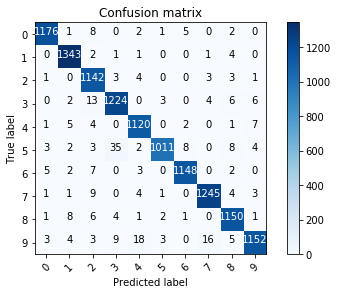

In [5]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

In [6]:
y_predict=model.predict_classes(x_predict)

In [7]:

output=pd.DataFrame(y_predict)
output.index+=1
output.to_csv("output.csv",index_label="ImageId",header=["Label"] )